## 의사결정 트리_Decision Tree 알고리즘-연습문제

### 데이터 세트
- UCI Machine Learning 저장소의 독일 신용 데이터를 통해 결정트리 분류 분석 수행

### 의사결정 트리 알고리즘 사용 신용 등급 예측 모델링 
- 의사결정 트리 그래프
- 모델링
- 하이퍼 파라미터 튜닝
- 성능평가지표 출력
- 피처 중요도 확인 


In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import pandas as pd
credit_df = pd.read_csv('../../data/credit_final.csv')
credit.head()


,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [27]:
from sklearn.model_selection import train_test_split

# 데이터 준비/ 분리
feature_data = credit_df.drop('credit.rating', axis=1)
label_data = credit_df['credit.rating']

# feature_data
# label_data.info()
# label_data.value_counts(normalize=True)

X_train, X_test, y_train, y_test = train_test_split(feature_data, 
                                                    label_data, 
                                                    stratify=label_data,
                                                    random_state=11)

In [28]:
# 의사결정 트리 Classifier (분류기) 생성 및 학습
from sklearn.tree import DecisionTreeClassifier

# 모델 생성 및 학습
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [34]:
feature_names = list(feature_data.columns)

<Figure size 1000x700 with 0 Axes>

[Text(0.5416666666666666, 0.875, 'account.balance <= 2.5\ngini = 0.42\nsamples = 750\nvalue = [225, 525]'),
 Text(0.3333333333333333, 0.625, 'credit.duration.months <= 22.5\ngini = 0.495\nsamples = 423\nvalue = [190, 233]'),
 Text(0.16666666666666666, 0.375, 'previous.credit.payment.status <= 1.5\ngini = 0.454\nsamples = 235\nvalue = [82, 153]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.388\nsamples = 19\nvalue = [14, 5]'),
 Text(0.25, 0.125, 'gini = 0.431\nsamples = 216\nvalue = [68, 148]'),
 Text(0.5, 0.375, 'savings <= 2.5\ngini = 0.489\nsamples = 188\nvalue = [108, 80]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.464\nsamples = 150\nvalue = [95, 55]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.45\nsamples = 38\nvalue = [13, 25]'),
 Text(0.75, 0.625, 'age <= 19.5\ngini = 0.191\nsamples = 327\nvalue = [35, 292]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.375, 'age <= 65.0\ngini = 0.187\nsamples = 326\nvalue = [34, 2

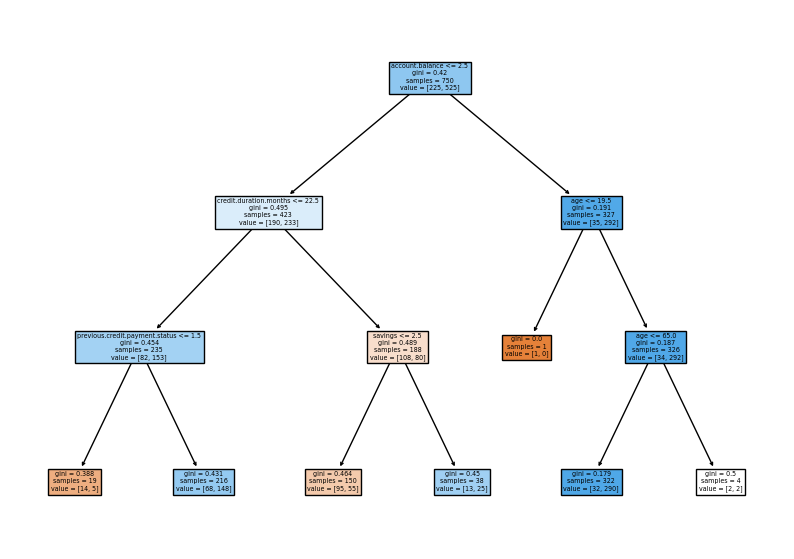

In [57]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt_clf, filled=True, feature_names=feature_names)
plt.show()

In [37]:
# 성능평가지표 출력
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score  

def get_clf_eval(y_test, y_pred, pred_proba) :
    cm = confusion_matrix(y_test, y_pred) # 혼동행렬(오차행렬)    
    accuracy = accuracy_score(y_test, y_pred) # 정확도   
    precision = precision_score(y_test, y_pred) # 정밀도  
    recall = recall_score(y_test, y_pred) # 재현율
    f1 =  f1_score(y_test, y_pred) # F1 스코어
    roc_auc = roc_auc_score(y_test, pred_proba) # ROC_AUC 스코어

    # 출력
    # 오차행렬
    print(f"{cm} <- 오차행렬")
    # 정확도, 정밀도, 재현율, F1
    print(f" 정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, F1 : {f1:.4f}, ROC_AUC : {roc_auc:.4f} ")

In [53]:
dt_clf = DecisionTreeClassifier(max_depth = 3, random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [54]:
y_pred = dt_clf.predict(X_test)
pred_proba = dt_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred, pred_proba)

[[ 30  45]
 [ 19 156]] <- 오차행렬
 정확도 : 0.7440, 정밀도 : 0.7761, 재현율 : 0.8914, F1 : 0.8298, ROC_AUC : 0.6782 


In [ ]:
# max_depth 설정 없음
# [[ 34  41]
# [ 46 129]] <- 오차행렬
# 정확도 : 0.6520, 정밀도 : 0.7588, 재현율 : 0.7371, F1 : 0.7478, ROC_AUC : 0.5952 

# max_depth = 3  ******
# [[ 30  45]
# [ 19 156]] <- 오차행렬
# 정확도 : 0.7440, 정밀도 : 0.7761, 재현율 : 0.8914, F1 : 0.8298, ROC_AUC : 0.6782 

# min_samples_split=4
# [[ 36  39]
# [ 48 127]] <- 오차행렬
# 정확도 : 0.6520, 정밀도 : 0.7651, 재현율 : 0.7257, F1 : 0.7449, ROC_AUC : 0.6038 




In [55]:
# 피처 중요도 확인

# 피처 이름
# feature_names

# 피처별 중요도 
# dt_clf.feature_importances_

# featuure 별 importance 맵핑 : zip() 사용
for name, value in zip(feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

account.balance : 0.635
credit.duration.months : 0.156
previous.credit.payment.status : 0.091
credit.purpose : 0.000
credit.amount : 0.000
savings : 0.076
employment.duration : 0.000
installment.rate : 0.000
marital.status : 0.000
guarantor : 0.000
residence.duration : 0.000
current.assets : 0.000
age : 0.042
other.credits : 0.000
apartment.type : 0.000
bank.credits : 0.000
occupation : 0.000
dependents : 0.000
telephone : 0.000
foreign.worker : 0.000


C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

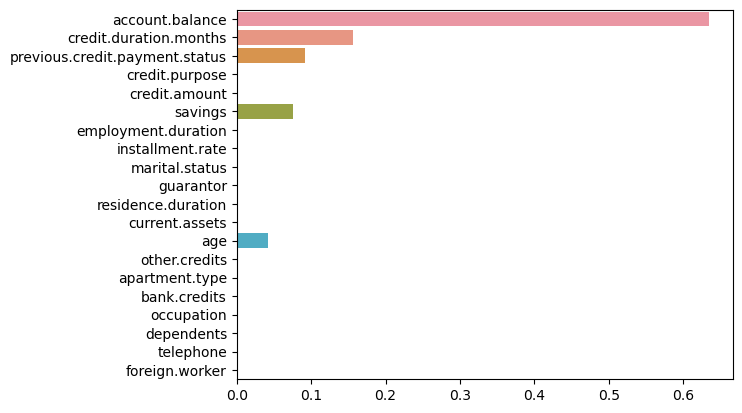

In [56]:
import seaborn as sns
# feature_importances_를 컬럼 별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=feature_names)